In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
X=df.iloc[:,:4]
y=df['species']

X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
pip install mlxtend


Note: you may need to restart the kernel to use updated packages.


In [25]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr=LogisticRegression()
sel=EFS(lr,max_features=4,scoring='accuracy',cv=5)

In [26]:
model=sel.fit(X,y)

C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  
C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [28]:
print('Best accuracy score: %.2f' % model.best_score_)
print('Best subset (indices):', model.best_idx_)
print('Best subset (corresponding names):', model.best_feature_names_)

Best accuracy score: 0.97
Best subset (indices): (1, 2, 3)
Best subset (corresponding names): ('sepal_width', 'petal_length', 'petal_width')


In [29]:
#detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [31]:
metric_df= pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df.sort_values('avg_score', ascending=False)
metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.6666666666666666, 0.7333333333333333, 0.766...",0.753333,"(sepal_length,)",0.069612,0.05416,0.02708
1,"(1,)","[0.5333333333333333, 0.5666666666666667, 0.533...",0.56,"(sepal_width,)",0.049963,0.038873,0.019437
2,"(2,)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(petal_length,)",0.051412,0.04,0.02
3,"(3,)","[1.0, 0.9666666666666667, 0.9, 0.9333333333333...",0.96,"(petal_width,)",0.049963,0.038873,0.019437
4,"(0, 1)","[0.7333333333333333, 0.8333333333333334, 0.766...",0.82,"(sepal_length, sepal_width)",0.079462,0.061824,0.030912
5,"(0, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_length, petal_length)",0.051412,0.04,0.02
6,"(0, 3)","[0.9333333333333333, 0.9666666666666667, 0.933...",0.953333,"(sepal_length, petal_width)",0.034274,0.026667,0.013333
7,"(1, 2)","[0.9333333333333333, 1.0, 0.9, 0.9333333333333...",0.953333,"(sepal_width, petal_length)",0.051412,0.04,0.02
8,"(1, 3)","[0.9333333333333333, 0.9666666666666667, 0.9, ...",0.94,"(sepal_width, petal_width)",0.032061,0.024944,0.012472
9,"(2, 3)","[0.9666666666666667, 0.9666666666666667, 0.933...",0.96,"(petal_length, petal_width)",0.032061,0.024944,0.012472


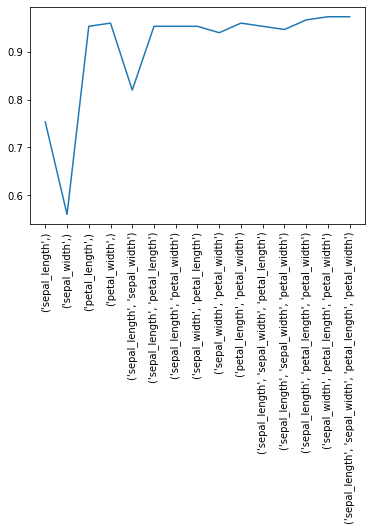

In [32]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

### Regression Example

In [74]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [75]:
X=df.iloc[:,:-1]
y=df['medv']

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2)


In [77]:
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [85]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [86]:
#model
from sklearn.metrics import r2_score
model=LinearRegression()

cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
print("Training",np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

Training 0.7025123301096212
testing 0.6514899901155403


In [87]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

exception calling callback for <Future at 0x19f045d1f30 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 359, in __call__
    **backend_params
  File "C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    # registers the task outcome (TASK_ERROR or TASK_DONE), and schedules
  File "C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    with self.parallel._lock:
  File "C:\Users\Lucky Singh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
  File "C:\Users\Lucky Singh\AppData\Local\Programs\

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [88]:
print('Best accuracy score: %.2f' % exh1best_score_)
print('Best subset (indices):', exh.best_idx_)
print('Best subset (corresponding names):', exh.best_feature_names_)

NameError: name 'efs1' is not defined

In [89]:
X_train_sel=sel.transform(X_train)
X_test_sel=sel.transform(X_test)

In [90]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.27258668236303746
testing 0.09773931292601405


### Sequential Backward Elimination

In [111]:
import pandas as pd
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error

In [112]:
# load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

X=df.iloc[:,:-1]
y=df['medv']

In [113]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [114]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [117]:
#apply model
lr=LinearRegression()
print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [118]:
sfs1=SFS(lr,k_features='best',forward=True,floating=False,cv=5,scoring='r2')
sfs1=sfs1.fit(X_train,y_train)

In [119]:
#Via the subsets_ attribute, we can take a look at the selected feature indices at each step:
sfs1.subsets_

{1: {'feature_idx': (12,),
  'cv_scores': array([0.54729984, 0.49002001, 0.5381464 , 0.56213521, 0.55465176]),
  'avg_score': 0.538450646821911,
  'feature_names': ('12',)},
 2: {'feature_idx': (5, 12),
  'cv_scores': array([0.63308563, 0.57798121, 0.58600685, 0.64510909, 0.62411232]),
  'avg_score': 0.6132590203002118,
  'feature_names': ('5', '12')},
 3: {'feature_idx': (5, 10, 12),
  'cv_scores': array([0.72158969, 0.6288372 , 0.63341487, 0.65720224, 0.66401567]),
  'avg_score': 0.661011934286666,
  'feature_names': ('5', '10', '12')},
 4: {'feature_idx': (5, 10, 11, 12),
  'cv_scores': array([0.72587722, 0.63426043, 0.6558192 , 0.65966573, 0.66129161]),
  'avg_score': 0.6673828379740255,
  'feature_names': ('5', '10', '11', '12')},
 5: {'feature_idx': (5, 7, 10, 11, 12),
  'cv_scores': array([0.74407562, 0.64734499, 0.61455489, 0.68050098, 0.67100229]),
  'avg_score': 0.6714957524062923,
  'feature_names': ('5', '7', '10', '11', '12')},
 6: {'feature_idx': (4, 5, 7, 10, 11, 12),
  

In [120]:
print('Best accuracy score: %.2f' % sfs1.k_score_)
print('Best subset (indices):', sfs1.k_feature_idx_)
print('Best subset (corresponding names):', sfs1.k_feature_names_)

Best accuracy score: 0.71
Best subset (indices): (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)
Best subset (corresponding names): ('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')


In [125]:
# Sequential Forward Selection
sfs = SFS(lr, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=5)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=best):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)



Sequential Forward Selection (k=best):
(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)
CV Score:
0.7100327839218561


In [127]:

# Sequential Backward Selection
sbs = SFS(lr, 
          k_features='best', 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=5)
sbs = sbs.fit(X_train, y_train)

print('\nSequential Backward Selection (k=best):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)




Sequential Backward Selection (k=best):
(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)
CV Score:
0.7100327839218561


In [129]:

# Sequential Forward Floating Selection
sffs = SFS(lr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           scoring='r2',
           cv=5)
sffs = sffs.fit(X_train, y_train)

print('\nSequential Forward Floating Selection (k=best):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)



Sequential Forward Floating Selection (k=best):
(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)
CV Score:
0.7100327839218561


In [131]:

# Sequential Backward Floating Selection
sbfs = SFS(lr, 
           k_features='best', 
           forward=False, 
           floating=True, 
           scoring='r2',
           cv=5)
sbfs = sbfs.fit(X_train, y_train)

print('\nSequential Backward Floating Selection (k=best):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Backward Floating Selection (k=best):
(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)
CV Score:
0.7100327839218561


In [133]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [134]:
metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
1,"(12,)","[0.5472998394577442, 0.49002001493399727, 0.53...",0.538451,"(12,)",0.032755,0.025485,0.012742,404,1,0.537303
2,"(5, 12)","[0.6330856272904802, 0.5779812120755249, 0.586...",0.613259,"(5, 12)",0.034066,0.026505,0.013252,404,2,0.61133
3,"(5, 10, 12)","[0.7215896884753017, 0.6288372046797153, 0.633...",0.661012,"(5, 10, 12)",0.04259,0.033136,0.016568,404,3,0.65847
4,"(5, 10, 11, 12)","[0.725877216548624, 0.6342604286872173, 0.6558...",0.667383,"(5, 10, 11, 12)",0.039611,0.030819,0.01541,404,4,0.664048
5,"(5, 7, 10, 11, 12)","[0.7440756174774326, 0.6473449858158777, 0.614...",0.671496,"(5, 7, 10, 11, 12)",0.055057,0.042836,0.021418,404,5,0.667369
6,"(4, 5, 7, 10, 11, 12)","[0.7554472741494642, 0.6695521143038103, 0.653...",0.68562,"(4, 5, 7, 10, 11, 12)",0.047626,0.037054,0.018527,404,6,0.680869
7,"(1, 4, 5, 7, 10, 11, 12)","[0.7548843433907461, 0.6798073590310516, 0.662...",0.6913,"(1, 4, 5, 7, 10, 11, 12)",0.042762,0.03327,0.016635,404,7,0.685844
8,"(0, 1, 4, 5, 7, 10, 11, 12)","[0.7678201537729974, 0.6827004362205138, 0.671...",0.695442,"(0, 1, 4, 5, 7, 10, 11, 12)",0.048774,0.037948,0.018974,404,8,0.689274
9,"(0, 1, 4, 5, 7, 8, 10, 11, 12)","[0.7746648196407366, 0.6850585456872307, 0.683...",0.703763,"(0, 1, 4, 5, 7, 8, 10, 11, 12)",0.04762,0.03705,0.018525,404,9,0.696996
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905563, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,404,10,0.702654


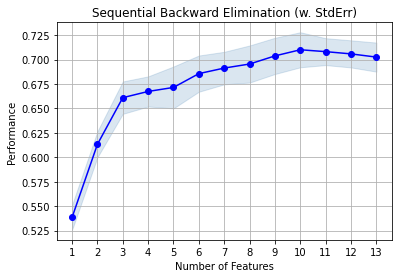

In [135]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [136]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


In [137]:
X_train_sel.shape

(404, 10)